# CLUSTERING ANALYSIS



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Excel dataset
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Display the first few rows
print(df.head())

# Get information about the dataset
print(df.info())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 en

###  Data Preprocessing & EDA

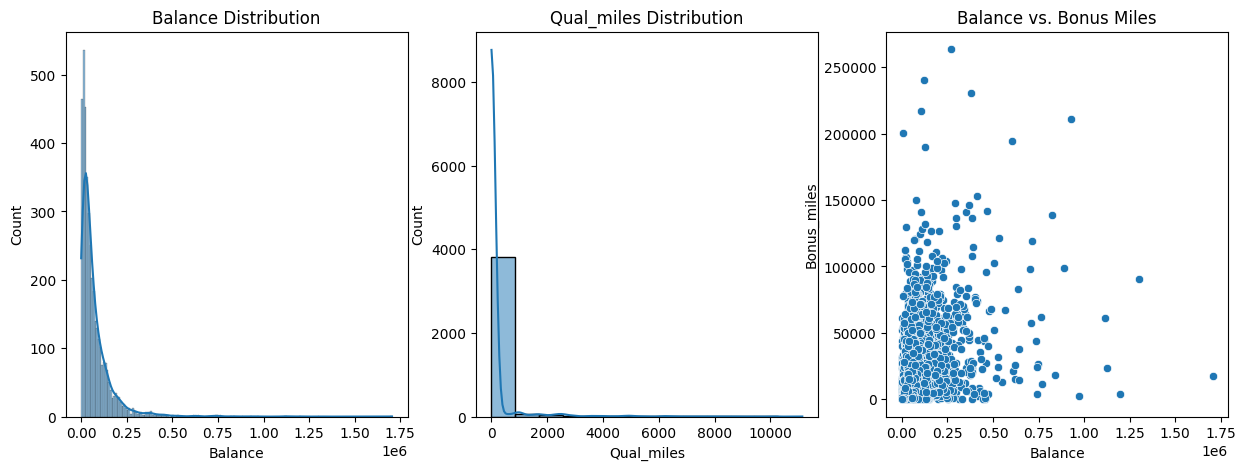

In [ ]:
# Drop the ID# column as it's not useful for clustering
df = df.drop('ID#', axis=1)

# Perform exploratory data analysis (EDA)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Balance'], kde=True)
plt.title('Balance Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Qual_miles'], kde=True)
plt.title('Qual_miles Distribution')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Balance', y='Bonus_miles', data=df)
plt.title('Balance vs. Bonus Miles')
plt.show()

# Scale all features since they are on different scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

###Implementing Clustering Algorithms

####K-Means Clustering

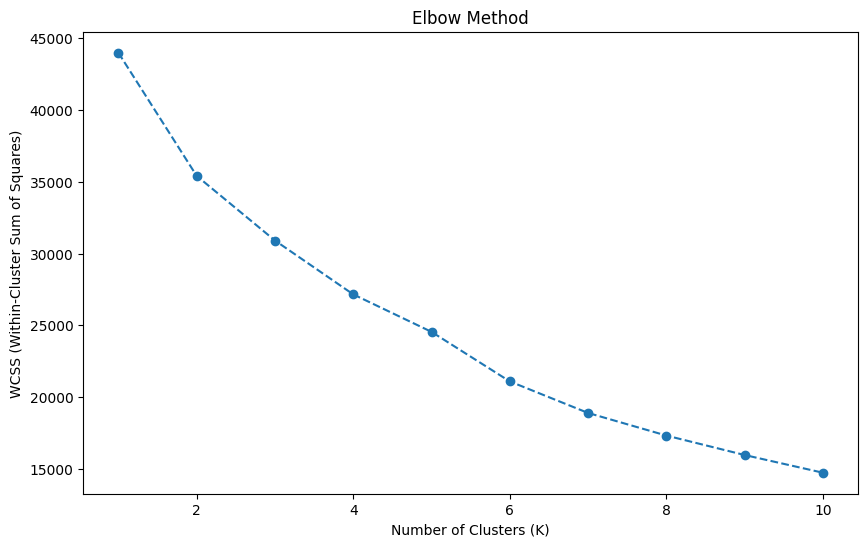

In [ ]:
# Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the elbow plot, let's assume the optimal K is 4 or 5
# Let's choose K=4 for this example
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe for analysis
df['KMeans_Cluster'] = kmeans_labels

####Hierarchical Clustering

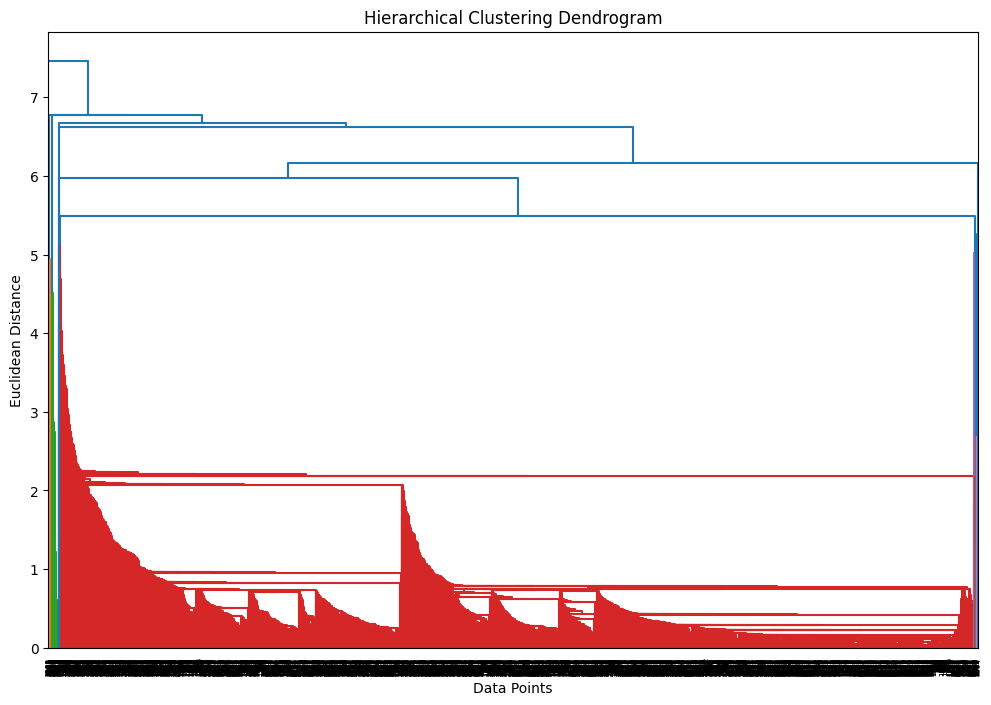

In [ ]:
# single linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage(X_scaled, method='single'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


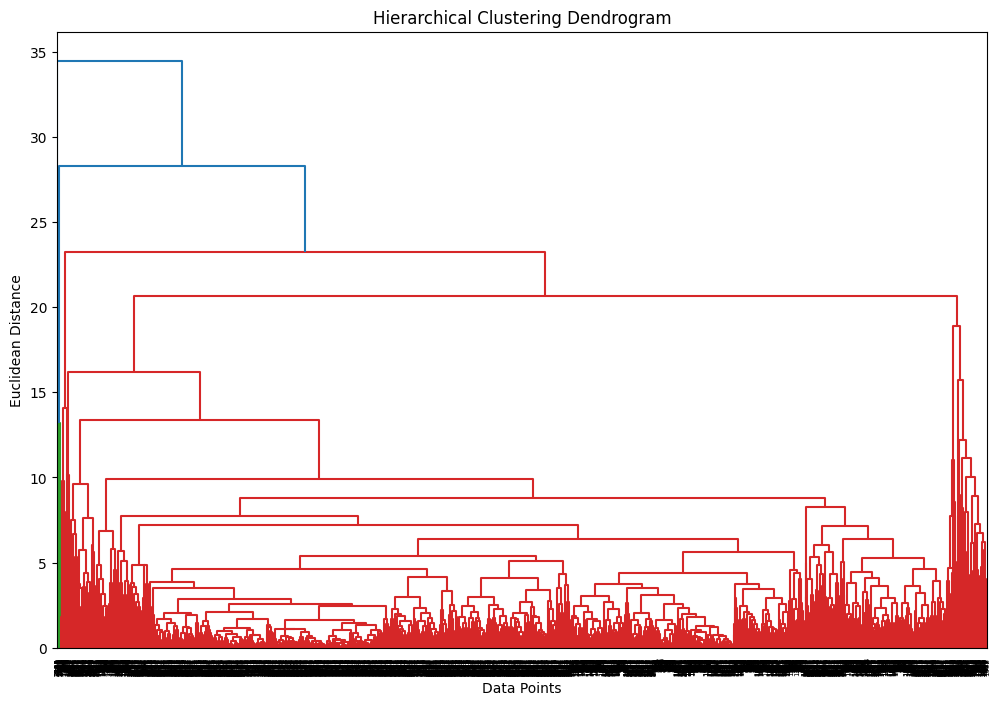

In [ ]:
# Complete linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage(X_scaled, method='complete'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


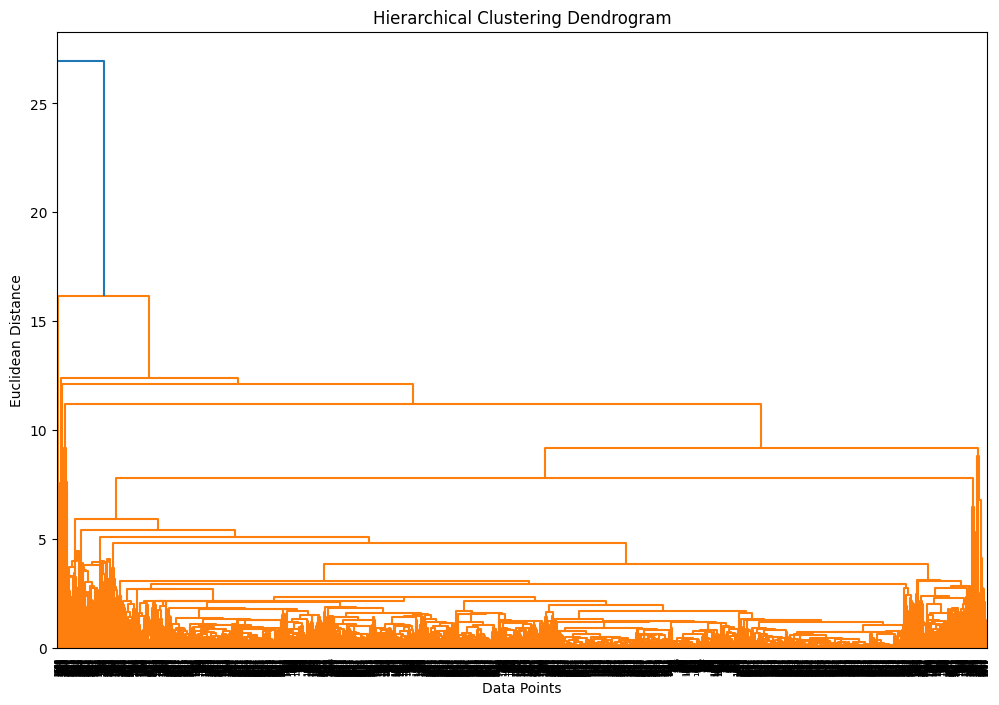

In [ ]:
# Centroid linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage(X_scaled, method='centroid'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


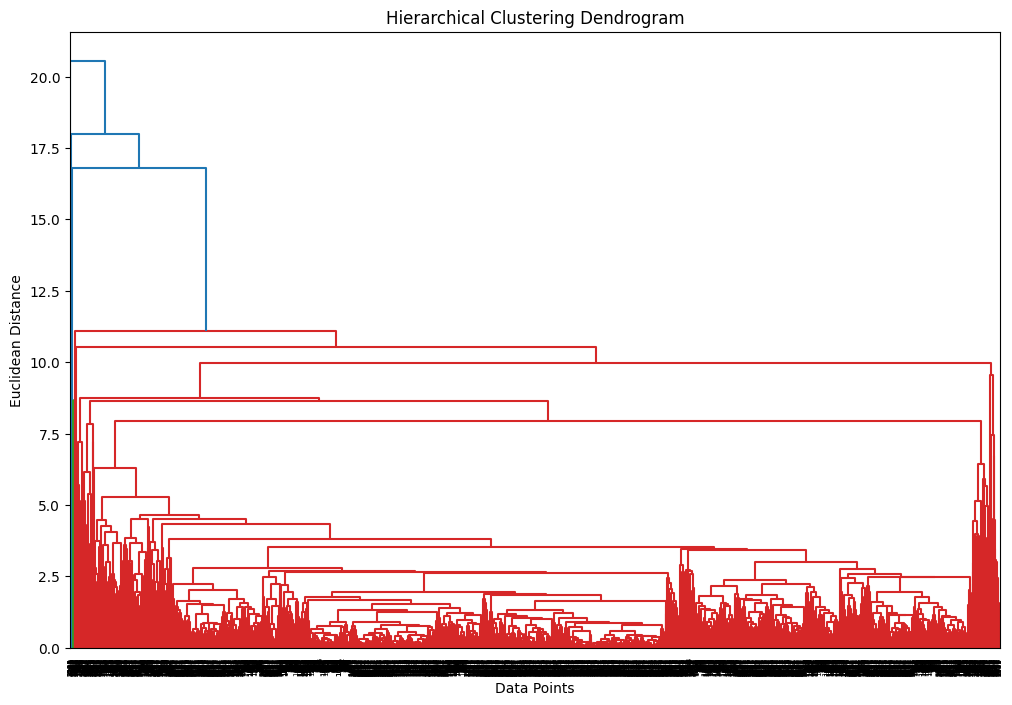

In [ ]:
# average linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage(X_scaled, method='average'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


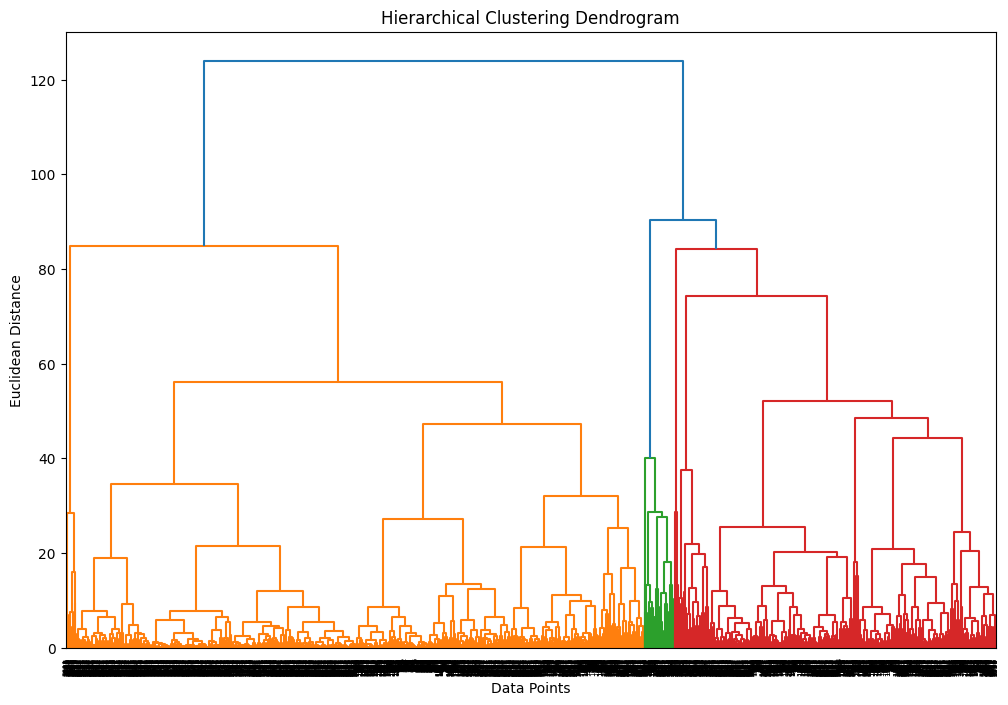

In [ ]:
# Ward linkage
plt.figure(figsize=(12, 8))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
linkage_methods = ['ward', 'complete', 'average', 'single']

# Evaluate each linkage method

best_method = None
best_score = -1
best_k = None

for method in linkage_methods:
    print(f"\nTesting linkage: {method}")
    for n_clusters in range(2, 10):  # test cluster counts 2 to 9
        try:
            if method == 'ward':
                # Ward linkage only works with Euclidean distance
                H_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, metric='euclidean')
            else:
                H_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

            labels = H_model.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            print(f"Clusters={n_clusters}, Silhouette={score:.4f}")

            if score > best_score:
                best_score = score
                best_method = method
                best_k = n_clusters
        except Exception as e:
            print(f"Skipped {method} with {n_clusters} clusters (Error: {e})")

# Display best result
print("\n" + "="*50)
print(f"✅ Best Linkage Method: {best_method}")
print(f"✅ Optimal Number of Clusters: {best_k}")
print(f"✅ Best Silhouette Score: {best_score:.4f}")


Testing linkage: ward
Clusters=2, Silhouette=0.2893
Clusters=3, Silhouette=0.2940
Clusters=4, Silhouette=0.3081
Clusters=5, Silhouette=0.3099
Clusters=6, Silhouette=0.3193
Clusters=7, Silhouette=0.1897
Clusters=8, Silhouette=0.1891
Clusters=9, Silhouette=0.1952

Testing linkage: complete
Clusters=2, Silhouette=0.8111
Clusters=3, Silhouette=0.7761
Clusters=4, Silhouette=0.5986
Clusters=5, Silhouette=0.5626
Clusters=6, Silhouette=0.5404
Clusters=7, Silhouette=0.5419
Clusters=8, Silhouette=0.5355
Clusters=9, Silhouette=0.5313

Testing linkage: average
Clusters=2, Silhouette=0.8111
Clusters=3, Silhouette=0.7839
Clusters=4, Silhouette=0.7731
Clusters=5, Silhouette=0.7700
Clusters=6, Silhouette=0.6618
Clusters=7, Silhouette=0.6346
Clusters=8, Silhouette=0.6206
Clusters=9, Silhouette=0.6158

Testing linkage: single
Clusters=2, Silhouette=0.8563
Clusters=3, Silhouette=0.7351
Clusters=4, Silhouette=0.5380
Clusters=5, Silhouette=0.5379
Clusters=6, Silhouette=0.5364
Clusters=7, Silhouette=0.5372

In [ ]:
# Based on the dendrogram, a cut at a certain height would likely reveal 4 clusters
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='complete') # because single is not forming good cluster
hierarchical_labels = hierarchical.fit_predict(X_scaled)
df['Hierarchical_Cluster'] = hierarchical_labels

####DBSCAN

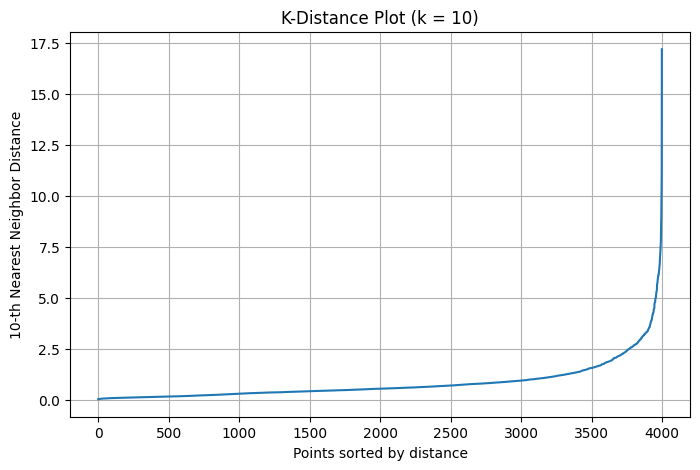

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_samples = 10

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances for the k-th nearest neighbor
k_distances = np.sort(distances[:, -1])

# -----------------------------
# Step 4: Plot K-Distance Graph
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title(f'K-Distance Plot (k = {min_samples})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

In [ ]:
eps_values = np.arange(1.5, 2.5, 0.1)
min_samples_values = range(10,15)

# -------------------------------
# Step 3: Grid Search for Best Params
# -------------------------------
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_scaled)

        # Skip cases where all points are noise or one cluster
        if len(set(labels)) <= 1 or -1 in set(labels) and len(set(labels)) == 2:
            continue

        score = silhouette_score(X_scaled, labels)
        print(f"eps={eps:.2f}, min_samples={min_samples}, Silhouette={score:.4f}")

        if score > best_score:
            best_score = score
            best_params = (eps, min_samples)

# -------------------------------
# Step 4: Display Best Combination
# -------------------------------
if best_params:
    print("\n" + "="*50)
    print(f"✅ Best Parameters Found:")
    print(f"eps = {best_params[0]:.2f}")
    print(f"min_samples = {best_params[1]}")
    print(f"Best Silhouette Score = {best_score:.4f}")
    print("="*50)
else:
    print("No valid clusters found for any parameter combination.")

eps=1.50, min_samples=10, Silhouette=0.2462
eps=1.50, min_samples=11, Silhouette=0.2461
eps=1.50, min_samples=12, Silhouette=0.2450
eps=1.50, min_samples=13, Silhouette=0.2334
eps=1.50, min_samples=14, Silhouette=0.2329
eps=1.60, min_samples=10, Silhouette=0.2496
eps=1.60, min_samples=11, Silhouette=0.2492
eps=1.60, min_samples=12, Silhouette=0.2486
eps=1.60, min_samples=13, Silhouette=0.2485
eps=1.60, min_samples=14, Silhouette=0.2477
eps=1.70, min_samples=10, Silhouette=0.2516
eps=1.70, min_samples=11, Silhouette=0.2515
eps=1.70, min_samples=12, Silhouette=0.2506
eps=1.70, min_samples=13, Silhouette=0.2505
eps=1.70, min_samples=14, Silhouette=0.2500
eps=1.80, min_samples=10, Silhouette=0.2526
eps=1.80, min_samples=11, Silhouette=0.2522
eps=1.80, min_samples=12, Silhouette=0.2519
eps=1.80, min_samples=13, Silhouette=0.2519
eps=1.80, min_samples=14, Silhouette=0.2515
eps=1.90, min_samples=10, Silhouette=0.2546
eps=1.90, min_samples=11, Silhouette=0.2543
eps=1.90, min_samples=12, Silhou

In [ ]:
dbscan = DBSCAN(eps=2.4, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

df['DBSCAN_Cluster'] = dbscan_labels

###  Visualizations

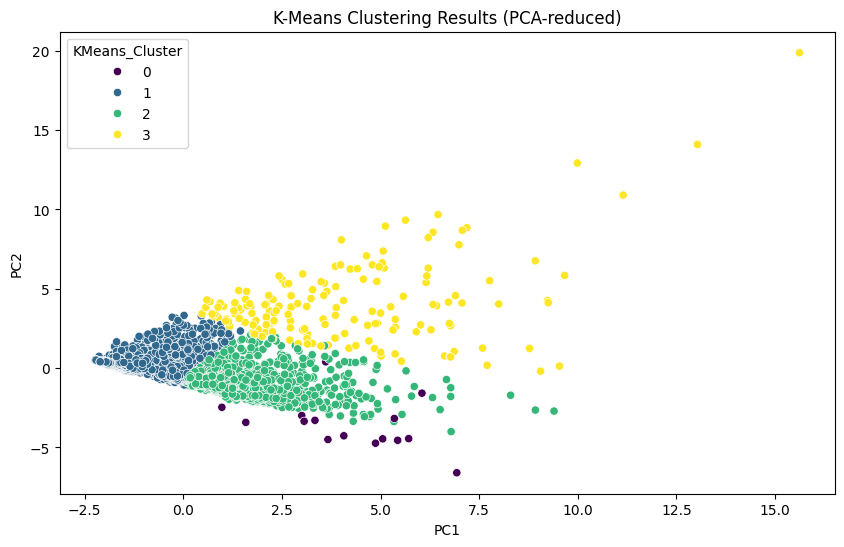

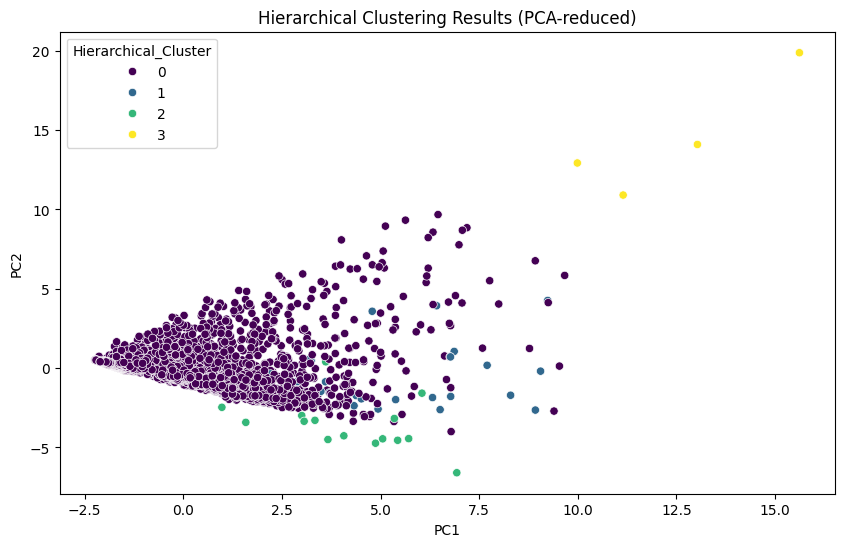

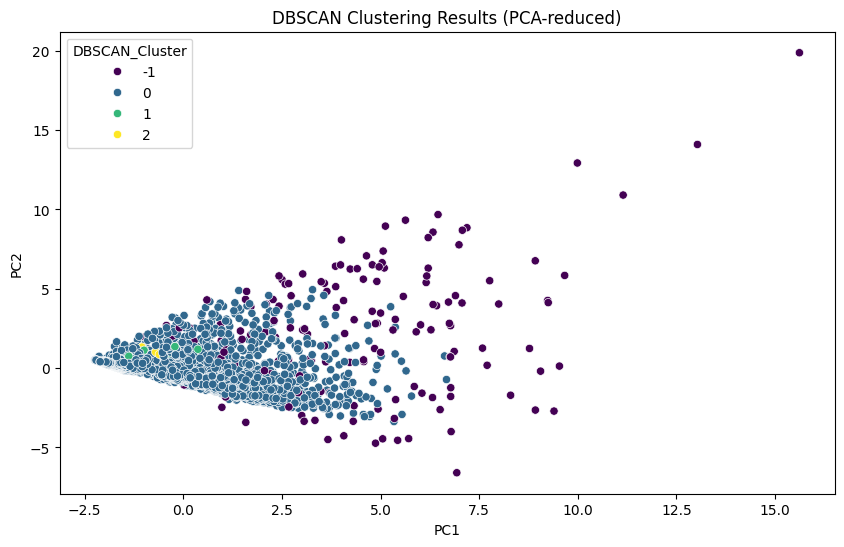

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['Hierarchical_Cluster'] = hierarchical_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels

# Visualize K-Means Clusters on PCA-reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.show()

# Visualize Hierarchical Clusters on PCA-reduced data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=pca_df, palette='viridis')
plt.title('Hierarchical Clustering Results (PCA-reduced)')
plt.show()

# Visualize DBSCAN Clusters on PCA-reduced data
# Note: DBSCAN may identify many points as noise (-1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=pca_df, palette='viridis')
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.show()



###  Evaluation with Silhouette Score

In [ ]:
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_labels)}")
print(f"Hierarchical Silhouette Score: {silhouette_score(X_scaled, hierarchical_labels)}")
if len(np.unique(dbscan_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(X_scaled, dbscan_labels)}")
else:
    print("DBSCAN could not form more than one cluster (or only noise), cannot calculate Silhouette Score.")

K-Means Silhouette Score: 0.30918774313627845
Hierarchical Silhouette Score: 0.5985727763092806
DBSCAN Silhouette Score: 0.545381731603299
